**EECS 4413 Course Project**

In [ ]:
pip install google-play-scraper

**TASK 1**

Note: The main application Parlera does not have any reviews on google play.

- One of its competitor applications which is Charades also does not have any reviews and hence these 2 applications are not used to analyze our data.

- Also, the first 250 reviews are only from one application. You can use indexing [13100:13300] to see the next applications reviews and data and for the third app, you can index [27000:27250] to see those reviews when printing the value

- Lastly, please use the reviews_classified_lemmatized.csv file that I provided when running task 4. The data is the same only the column names have been changed to make it consistent with task 1 column naming.

In [ ]:
from google_play_scraper import app

import pandas as pd

import numpy as np

In [ ]:
from google_play_scraper import Sort, reviews_all, reviews
import pandas as pd
import numpy as np

package_names = [
    "com.matchasaucellc.word.hound.android",
    "com.peoplefun.wordcross",
    "com.wb.headsup"
]

desired_reviews = 13000

# Create an empty DataFrame to store all reviews
df_all_reviews = pd.DataFrame(columns=['Package Name', 'Reviewer Name', 'Review', 'Rating'])

for package_name in package_names:
    all_reviews = []
    continuation_token = None

    while len(all_reviews) < desired_reviews:
        package_reviews, continuation_token = reviews(
            package_name,
            lang='en',
            sort=Sort.NEWEST,
            count=desired_reviews - len(all_reviews),
            continuation_token=continuation_token,
        )

        all_reviews.extend(package_reviews)

        if not continuation_token:
            break

    df_package = pd.DataFrame(np.array(package_reviews), columns=['Review'])
    df_package = df_package.join(pd.DataFrame(df_package.pop('Review').tolist()))

    df_final_package = pd.DataFrame({
        'Package Name': package_name,
        'Reviewer Name': df_package['userName'],
        'Review': df_package['content'],
        'Rating': df_package['score'],
    })

    df_all_reviews = df_all_reviews.append(df_final_package, ignore_index=True)

csv_filename = 'com.enjoyingfoss.parlera.csv'
df_all_reviews.to_csv(csv_filename, mode='a', index=False)
print("Reviews collection completed.")


<ipython-input-30-0b28b6e1e254>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_reviews = df_all_reviews.append(df_final_package, ignore_index=True)
<ipython-input-30-0b28b6e1e254>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_reviews = df_all_reviews.append(df_final_package, ignore_index=True)


Reviews collection completed.


<ipython-input-30-0b28b6e1e254>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_reviews = df_all_reviews.append(df_final_package, ignore_index=True)


**TASK 2**

In [ ]:
import regex as re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from tabulate import tabulate
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
csv_filename = 'com.enjoyingfoss.parlera.csv'
df = pd.read_csv(csv_filename)

def preprocess_text(text):
    if pd.isna(text):
        return ''
    text = str(text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    text = text.lower()

    return text

def remove_stopwords_and_lemmatize(text):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()

    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    return ' '.join(tokens)

df['Review'] = df['Review'].apply(preprocess_text)
df['Review'] = df['Review'].apply(remove_stopwords_and_lemmatize)

preprocessed_csv_filename = 'com.enjoyingfoss.parlera_preprocessed.csv'
df.to_csv(preprocessed_csv_filename, index=False)

print(tabulate(df.head(15), headers='keys', tablefmt='pretty'))

+----+---------------------------------------+-------------------+------------------------------------------------------------------------------------------------------------------------+--------+
|    |             Package Name              |   Reviewer Name   |                                                         Review                                                         | Rating |
+----+---------------------------------------+-------------------+------------------------------------------------------------------------------------------------------------------------+--------+
| 0  | com.matchasaucellc.word.hound.android |   A Google user   |                                                       excellent                                                        |   4    |
| 1  | com.matchasaucellc.word.hound.android |    Teri Moody     |                                                       addicting                                                        |   5    |
| 2  | com.matc

Printing first 15 output samples ^^^

**TASK 3**

**I)** and **II)**

In [ ]:
from textblob import TextBlob

In [ ]:
csv_filename = 'com.enjoyingfoss.parlera_preprocessed.csv'
df = pd.read_csv(csv_filename)

def calculate_sentiment(text):
    analysis = TextBlob(str(text))
    return analysis.sentiment.polarity

df['textblob_Sentiment'] = df['Review'].apply(calculate_sentiment)

print(tabulate(df[['Package Name','Review', 'Rating','textblob_Sentiment']].head(250), headers='keys', tablefmt='pretty'))

+-----+---------------------------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------+-----------------------+
|     |             Package Name              |                                                                                                                                                      Review                                                                                                                                                       | Rating |  textblob_Sentiment   |
+-----+---------------------------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

**III)** and **IV)**

In [ ]:
pip install vaderSentiment

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
csv_filename = 'com.enjoyingfoss.parlera_preprocessed.csv'
df_2 = pd.read_csv(csv_filename)

def calculate_sentiment_vader(text):
    analyzer = SentimentIntensityAnalyzer()
    return analyzer.polarity_scores(str(text))['compound']


df_2['Vader_Sentiment'] = df_2['Review'][:250].apply(calculate_sentiment_vader)

print(tabulate(df_2[['Package Name','Review', 'Rating', 'Vader_Sentiment']].head(250), headers='keys', tablefmt='pretty'))

+-----+---------------------------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------+-----------------+
|     |             Package Name              |                                                                                                                                                      Review                                                                                                                                                       | Rating | Vader_Sentiment |
+-----+---------------------------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

**V)**

In terms of similarities, both applications give a high sentiment result for happier user ratings that include lots of detail. And when there are very poor reviews or unhappy user description, both scores do go down to a relatively low value.

The main difference between these two types of analysis is that the Vader analysis does not include too many negative results compared to Textblob which has loads of negative sentiment. Also Vader sentiment values are much higher compared to Textblob which indicates that it does not account for noise the same way Textblob does.

When comparing the ratings for both of these sentiments, there are also many reviews which haven't been very happy, however their review ratings were 4 or 5. Likewise, there were reviews that enjoyed the game, but have recieved low ratings. So it is possible that there is noise within our reviews which can possibly hurt the relationship between ratings and sentiments.

In terms of the actual comparison of the ratings and sentiments, for high ratings, the vader sentiment results are very high. However for textblob, the values are not always high when comparing it to the ratings of the users. This could mean that the ratings do not give a direct indication on the results for textblob, but they do however for vader.

I am able to interpret the difference and similarities by looking the user reviews, application's ratings and sentiment results to try and understand a pattern that is observed for at least 50 rows.

In [ ]:
combined_df = pd.concat([df[['Review', 'Rating', 'textblob_Sentiment']], df_2[['Vader_Sentiment']]], axis=1)

print(tabulate(combined_df[['Review', 'Rating', 'textblob_Sentiment', 'Vader_Sentiment']].head(50), headers='keys', tablefmt='pretty'))

+----+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------+----------------------+-----------------+
|    |                                                                                                                                                   Review                                                                                                                                                    | Rating |  textblob_Sentiment  | Vader_Sentiment |
+----+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

**TASK 4**

**I)**

Classified any review category that contains the letter f to be 1 and the rest 0 for part I for the reviews_classified_lemmatized file I provided.

For part II, classified any review categroy that contains the letter b to be 1 and the rest 0 for the reviews_classified_lemmatized file I provided.

In [ ]:
csv_filename = 'reviews_classified_lemmatized.csv'
df = pd.read_csv(csv_filename)

def createBinaryClassification(text):
    text = str(text)
    if(text.__contains__('f')):
      text = str(1)
    else:
      text = str(0)

    return text


df["Review category"] = df['Review category'].apply(createBinaryClassification)

reviews_classified_binary_1_file = 'reviews_classified_binary_1.csv'
df.to_csv(reviews_classified_binary_1_file, index=False)

In [ ]:
csv_filename = 'reviews_classified_lemmatized.csv'
df = pd.read_csv(csv_filename)

def createBinaryClassification(text):
    text = str(text)
    if(text.__contains__('b')):
      text = str(1)
    else:
      text = str(0)

    return text


df["Review category"] = df['Review category'].apply(createBinaryClassification)

reviews_classified_binary_2_file = 'reviews_classified_binary_2.csv'
df.to_csv(reviews_classified_binary_2_file, index=False)

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score

In [ ]:
def load_data():
    data = pd.read_csv(DATA_URL)
    unwanted_columns = ['Date', 'Language', 'Review title']
    data = data.drop(columns=unwanted_columns, errors='ignore')
    label_encoder = LabelEncoder() #encoding the data
    for col in data.columns:
        data[col] = label_encoder.fit_transform(data[col])
    return data


def split(dataframe):
  x = dataframe.drop(columns=['Review category'])
  y = dataframe['Review category']
  return train_test_split(x, y, test_size=0.3, random_state=0)

def createClassifier():
  return RandomForestClassifier(n_estimators=500, max_depth=5, bootstrap=True, n_jobs=-1)

def plot_confusion_matrix(cm):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot()

**Data URL for part 1 of task 4 to train model**


In [ ]:
DATA_URL = 'reviews_classified_binary_1.csv'
df = load_data()
x_train, x_test, y_train, y_test = split(df)
# Create the classifier (SVM/Logistic Regression/Random Forest)
clf = createClassifier()

# train the classifier on the training data
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

In [ ]:
# make predictions on new data
DATA_URL = 'com.enjoyingfoss.parlera_preprocessed.csv'
data = pd.read_csv(DATA_URL)
new_df = load_data()

new_df['Review category'] = 0

x_new = new_df.drop(columns=['Review category'])

predictions = clf.predict(x_new)

# Add the predictions to the new data DataFrame
data['Review category'] = predictions

# Print a table with the original and predicted values
print(tabulate(data[["Package Name", "Reviewer Name", "Review", "Rating", "Review category"]][:250], headers='keys', tablefmt='pretty'))

+-----+---------------------------------------+--------------------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------+-----------------+
|     |             Package Name              |         Reviewer Name          |                                                                                                                                                      Review                                                                                                                                                       | Rating | Review category |
+-----+---------------------------------------+--------------------------------+----------------------------------------------------------------------------------------

**Data URL for part 2 of task 4 to train model**

**II)**

In [ ]:
DATA_URL = 'reviews_classified_binary_2.csv'
df = load_data()
x_train, x_test, y_train, y_test = split(df)
# Create the classifier (SVM/Logistic Regression/Random Forest)
clf = createClassifier()

# train the classifier on the training data
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

In [ ]:
DATA_URL = 'com.enjoyingfoss.parlera_preprocessed.csv'
data_2 = pd.read_csv(DATA_URL)
new_df = load_data()

new_df['Review category'] = 0

x_new = new_df.drop(columns=['Review category'])

predictions = clf.predict(x_new)

# Add the predictions to the new data DataFrame
data_2['Review category'] = predictions

# Print a table with the original and predicted values
print(tabulate(data_2[["Package Name", "Reviewer Name", "Review", "Rating", "Review category"]][:250], headers='keys', tablefmt='pretty'))

+-----+---------------------------------------+--------------------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------+-----------------+
|     |             Package Name              |         Reviewer Name          |                                                                                                                                                      Review                                                                                                                                                       | Rating | Review category |
+-----+---------------------------------------+--------------------------------+----------------------------------------------------------------------------------------

**III)**

The first recommendation I would give to the developers of these application is that they should try to reduce the number of ads they display for users. Many users do not like the amount of ads that are displayed and this is one area where users are not very happy with.

The second recommendation I would give is that some users do experience times when the game crashes and even freezes mid game. Some instances users also lose their game progress as well during these times. I would recommend developers to be able to save game progress of users after they re-open the application or even after uninstalling it as well.

These recommendations are made for all 3 applications based on the bug reports that I was able to view manually for 250 reviews for each application.

Accuracy: 0.8531073446327684
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       146
           1       0.60      0.48      0.54        31

    accuracy                           0.85       177
   macro avg       0.75      0.71      0.72       177
weighted avg       0.84      0.85      0.85       177



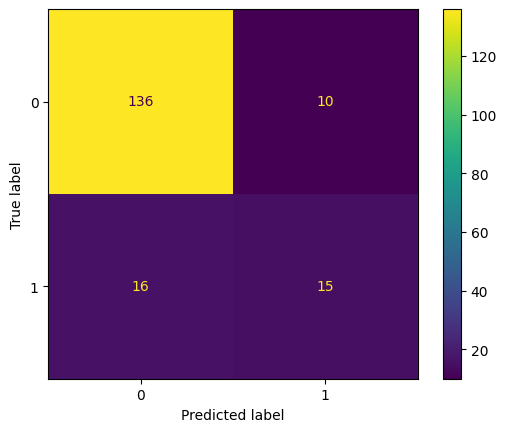

In [ ]:
# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred))

# plotting the confusion metrics
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
plot_confusion_matrix(cm)

**IV)**

The risk and uncertainty of the recommendations I made can be high because the precision, recall and f-score values for detecting a bug are 0.60, 0.48, 0.54 respectively and it is not very high. Although the percentage is determined by the type of application being predicted, a muich higher percentage would have been much better in order to not miss many issues. Although accuracy is 86%, this could still be uncertain the level of bug reviews found from users as some issues could have been missed by the machine. Even though there are 39000 rows in our dataset, chances of missing out on improvements can be found.

Also, based on what we learned in class, there can also be a possibility of lack of domain knowledge as well. Some users might understand the application better than others and hence they will have a different view compared to people who aren't as knowledgable within the domain.

Lastly, there is a chance of imbalanced datasets being provided as well when giving these recommendations. The datasets are not always balanced in this sense. For example, in terms of bug reports, there were very few reports for the Wordlook application. This could depend on how knowledgable the person is that works with the application as well.

**TASK 5**

**I)**

In [ ]:
import pprint
DATA_URL = 'com.enjoyingfoss.parlera_preprocessed.csv'

data = pd.read_csv(DATA_URL)

data['Review'] = data['Review'].fillna('')
text_corpus = data['Review'].tolist()

# Create a set of frequent words
stoplist = set('for a of the and to in'.split(' '))
# Lowercase each document, split it by white space and filter out stopwords
texts = [[word for word in document.lower().split() if word not in stoplist]
         for document in text_corpus]

# Count word frequencies
from collections import defaultdict
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

# Only keep words that appear more than once
processed_corpus = [[token for token in text if frequency[token] > 7] for text in texts]
# pprint.pprint(processed_corpus)


In [ ]:
from gensim import corpora, models

dictionary = corpora.Dictionary(processed_corpus)
bow_corpus = [dictionary.doc2bow(text) for text in processed_corpus]
tfidf = models.TfidfModel(bow_corpus) # initialize a model


In [ ]:
corpus_tfidf = tfidf[bow_corpus]
lsi_model = models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=50)  # initialize an LSI transformation
corpus_lsi = lsi_model[corpus_tfidf]

lsi_model.print_topics(50)

[(0,
  '0.928*"fun" + 0.219*"game" + 0.160*"great" + 0.147*"love" + 0.121*"challenging" + 0.093*"good" + 0.059*"play" + 0.044*"lot" + 0.043*"word" + 0.035*"really"'),
 (1,
  '0.856*"love" + -0.280*"fun" + 0.274*"great" + 0.274*"game" + 0.150*"good" + 0.057*"word" + 0.030*"brain" + 0.029*"app" + 0.026*"challenge" + 0.025*"play"'),
 (2,
  '0.766*"great" + -0.433*"love" + 0.403*"good" + 0.173*"game" + -0.154*"fun" + 0.045*"brain" + 0.027*"word" + 0.026*"mind" + 0.024*"time" + 0.022*"ad"'),
 (3,
  '0.876*"good" + -0.478*"great" + 0.039*"far" + 0.027*"brain" + 0.023*"really" + -0.012*"love" + 0.011*"app" + -0.010*"fun" + 0.009*"time" + 0.009*"like"'),
 (4,
  '0.954*"challenging" + -0.139*"fun" + 0.091*"word" + 0.089*"game" + -0.083*"love" + 0.077*"awesome" + -0.073*"great" + 0.062*"like" + 0.055*"ad" + 0.052*"addictive"'),
 (5,
  '0.595*"awesome" + 0.425*"game" + -0.242*"challenging" + 0.199*"ad" + -0.193*"great" + 0.191*"nice" + 0.171*"play" + 0.169*"like" + -0.155*"love" + 0.150*"word"'),

**II)**

When comparing topic modelling and the features extracted in task 4, it is important to understand that these 2 techniques do in fact allow analysts to understand the main theme of the users when using the application. In terms of similarities, the topics and features are very similar and task 4 categorizes each feature for every single review while topic modelling gets the most probable words that reviewers use and categorizes them in a topic.

The main difference is that analysts are able to categorize the topics of reviews based on word frequencies which can be a much better way of extracting the topics that users are frequently talking about. It is a lot more difficult to that when using a machine learning technqiue to extract features as some features can also be left out.

But in general, the topics and features are well-aligned and they are for the most part, they are exactly the same.

**III)**

When comparing the topics to the bug reports extracted from task 4, once again we can see that for the most part, the bugs are visible when looking at the categorized topics extracted as well. However, for bug reports, since there are very few bugs for some applications compared to the good reviews of the application, it might be easier to user task 4 to be able to analyze the bugs because it might not be very frequently used in the user reviews. In this case, task 4 would be much more suitable.


**IV)**

Similar to what was stated in part III, task 4 can be seen as a more accurate model compared to task 5. The first reasoning is because the model was trained on one dataset and hence this could allow for inaccurate results compared to topic modelling's approach to extracting topics. Another main challenge is how accurate the model is when looking at the f-score as well. In the case of topic modelling, we look more towards categorical representation of the most used words within reviews. This is a much more accurate technique when searching to extract the user's feedback and ideas compared to task 4. In terms of the size of data, since the size of data is very large and using the machine learning technique can be very long to figure out direct features that are categorized together with this method.

In terms of the recommendations made however, it is more beneficial to use the metholodgy in task 5 because bug reports were much more easier to determine in comparison to finding bugs within topic categorization. Even though the model accuracy is lower, it is still easier to determine bugs with this approach even with the size of data being to some extent very large.